<a href="https://colab.research.google.com/github/kotsun32/Deep_learning_practice/blob/main/02_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
n_samples = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X[:10]



array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"labels":y})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


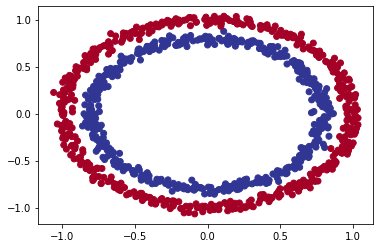

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5012


In [8]:
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4928
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4956
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4854
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4732
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4888
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5085
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4703
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4895
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4989
Epoch 11/

In [9]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=0)

In [10]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933176517486572, 0.5]

In [11]:
from tensorflow.python.ops.gen_array_ops import expand_dims
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_3.fit(expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 2.3571 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7097 - accuracy: 0.4915
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5044
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4928
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4865
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5131
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4978
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4926
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5023
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5089
Epoch 11/

In [12]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

In [13]:
def plot_decision_boundary(model,X,y):

  x_min, x_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



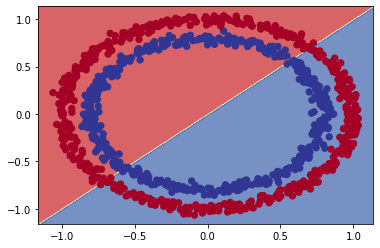

In [14]:
plot_decision_boundary(model_3,X,y)

In [15]:
from pyparsing.core import Optional
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)

])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])

model_4.fit(expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2732 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1783 - accuracy: 0.4965
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1319 - accuracy: 0.4972
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0867 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0225 - accuracy: 0.4967
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9695 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9023 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8551 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8040 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7407 - accuracy: 0.5006
Epoch 11/100
32/32 [=

In [16]:

tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1)
                               
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])

model_5.fit(expand_dims(X,axis=-1),y,epochs=100)




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

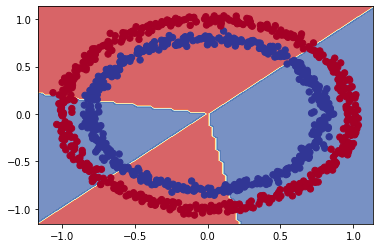

In [17]:
plot_decision_boundary(model_5,X,y) 

In [18]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,input_shape=[2],activation="relu"),  
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])

#model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])
history = model_6.fit(tf.expand_dims(X,axis=-1),y,epochs=100) 
#history = model_6.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [19]:
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]

In [20]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu",input_shape=[2]),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
lr_scheduler =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_7 = model_7.fit(expand_dims(X,axis=-1),y,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4990 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4990 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5060 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5120 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5120 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5120 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss:

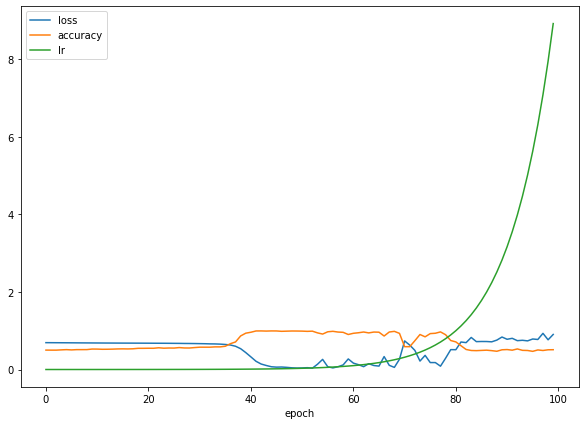

In [21]:
pd.DataFrame(history_7.history).plot(figsize=(10,7),xlabel="epoch",);

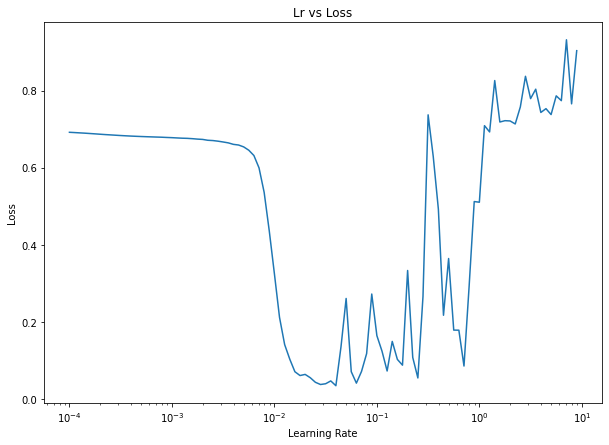

In [22]:
lrs= 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Lr vs Loss");


In [23]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,input_shape=[2],activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.02),metrics=["accuracy"])
model_8.fit(expand_dims(X,axis=-1),y,epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.5680
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5800
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6120
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7930
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7850
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8910
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9200
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9560
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9820
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9850
Epoch 11/20
32/32 [

In [24]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000


[0.02415526658296585, 1.0]

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_preds = model_8.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

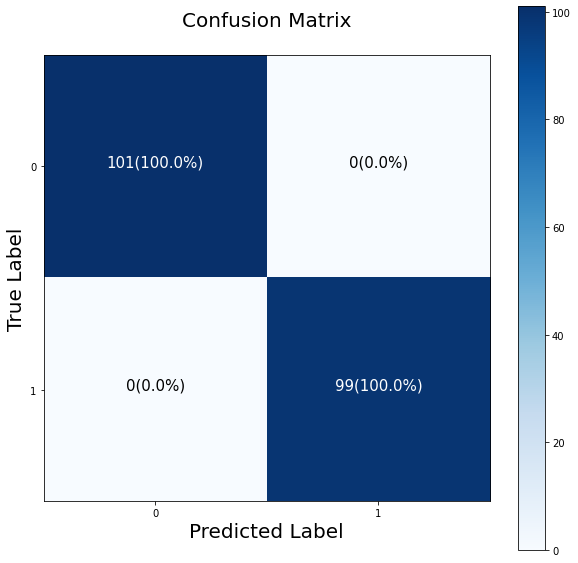

In [27]:
import itertools
 
figsize=(10,10)
cm= confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]
fig, ax = plt.subplots(figsize = figsize) 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False 

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",xlabel=("Predicted Label"),ylabel=("True Label"),xticks=np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=labels,yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() +cm.min()) /2

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size = 15)


In [28]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

In [29]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [30]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [31]:
train_data[0].shape

(28, 28)

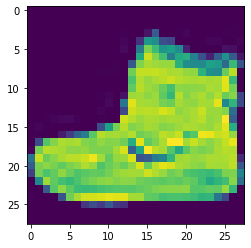

In [32]:
plt.imshow(train_data[0]);

In [33]:
train_labels[0]

9

In [34]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

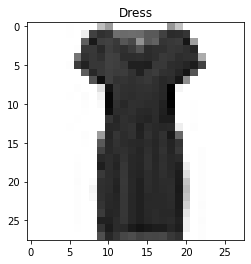

In [35]:
index_of_choice = 20
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

In [36]:
import random

#imput shape (28,28)
#output 10
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"), #going to have to change input size 28,28?
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")
])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy,optimizer="Adam",metrics=["accuracy"])

#non_norm_history = model_9.fit(expand_dims(train_data,axis=-1),train_labels,epochs=10,validation_data = (test_data,test_labels))

non_norm_history = model_9.fit(expand_dims(tf.one_hot(train_data,depth=10),axis=-1),train_labels,epochs=10,validation_data = (test_data,tf.one_hot(test_labels,depth=10)))
#non_norm_history = model_9.fit(tf.one_hot(train_data,depth=10),train_labels,epochs=10,validation_data = (test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10


ValueError: ignored

In [40]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [37]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [39]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(1,activation="softmax"),

])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) 

Epoch 1/10


InvalidArgumentError: ignored